In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/home/ryanwkrauss/git/py_block_diagram/py_block_diagram/__init__.py'>

In [7]:
import py_block_diagram as pybd

### Helper Function

- draw the block diagram as needed to verify things

In [8]:
def mydraw(block_list,xlim=None,ylim=None):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    mysys = pybd.block_diagram(block_list,ax)
    mysys.draw()
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    mysys.axis_off()
    return mysys

## System Description

In [9]:
block_list = []

In [10]:
U = pybd.int_constant_block(3500,"U_cl")

In [11]:
U.width = 4

In [12]:
U.place_absolute(0,0)

In [13]:
block_list.append(U)

In [14]:
sum1 = pybd.summing_junction()

In [15]:
sum1.place_relative(U,"right")

In [16]:
sum1.set_input1(U)

In [17]:
block_list.append(sum1)

In [18]:
D = pybd.PD_controller(0.1,0.01)

In [19]:
D.place_relative(sum1,"right")

In [20]:
D.set_input_block(sum1)

In [21]:
D.Kd

0.01

In [22]:
D.Kp

0.1

In [23]:
block_list.append(D)

In [24]:
diff_motors = pybd.custom_actuator("dual_motors","two_motors_dbl_actuator","&motors")

In [25]:
line_sense = pybd.custom_sensor("line_sense","qtr_line_sensor","&qtr")

In [26]:
G = pybd.plant_with_double_actuator(line_sense,diff_motors,"Robot")

In [27]:
sat = pybd.sat2_adjustable_block(150)

In [28]:
sat.set_input_block(D)

In [29]:
block_list.append(sat)

In [30]:
sat.place_relative(D, "right")

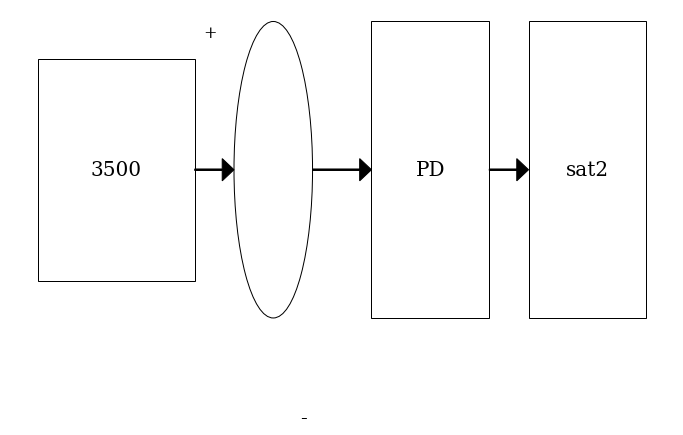

In [31]:
mydraw(block_list)

In [32]:
add1 = pybd.addition_block()

In [33]:
subtract1 = pybd.subtraction_block()

In [34]:
v_nom = pybd.int_constant_block(200,'v_nom_block')

In [35]:
v_nom.place_relative(sat, "right", yshift=4, xshift=-4)

In [36]:
block_list.append(v_nom)

In [37]:
add1.place_relative(sat, "right", yshift=1, xshift=3)

In [38]:
subtract1.place_relative(sat, "right", yshift=-2)

In [39]:
block_list.append(add1)

In [40]:
block_list.append(subtract1)

In [41]:
add1.set_inputs(v_nom, sat)

In [42]:
subtract1.set_inputs(v_nom, sat)

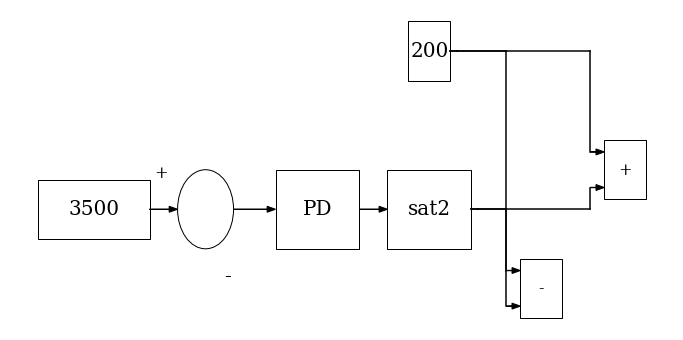

In [43]:
mydraw(block_list)

In [44]:
satP = pybd.sat2_adjustable_block(400,label="satP",variable_name="satP")

In [45]:
satP.place_relative(add1,"right")

In [46]:
block_list.append(satP)

In [47]:
satP.set_input_block(add1)

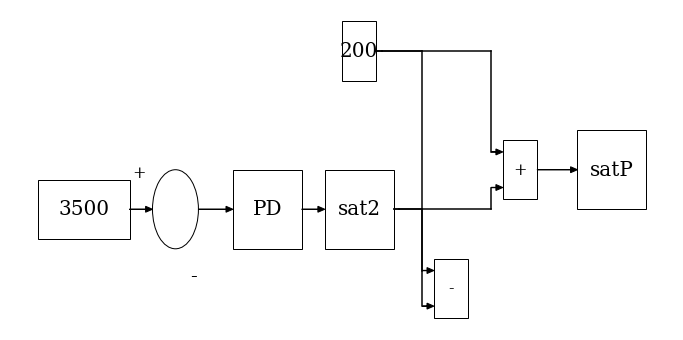

In [48]:
mydraw(block_list)

In [49]:
satN = pybd.sat2_adjustable_block(400,label="satN",variable_name="satN")

In [50]:
satN.place_relative(subtract1,"right")

In [51]:
block_list.append(satN)

In [52]:
satN.set_input_block(subtract1)

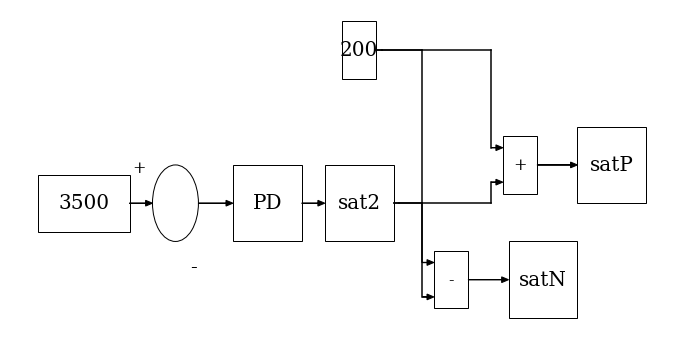

In [53]:
mydraw(block_list)

In [54]:
G.set_inputs(satP,satN)

In [55]:
G.place_relative(sat,"right",16)

In [56]:
block_list.append(G)

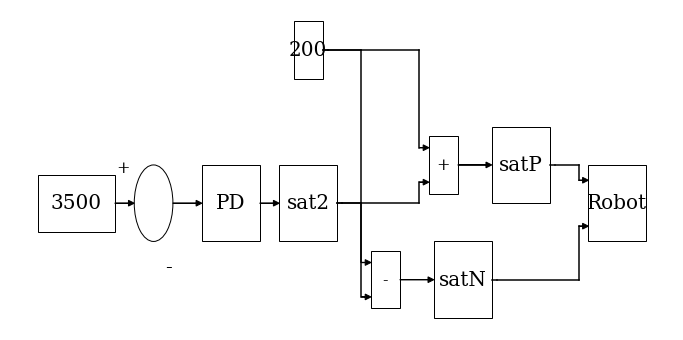

In [57]:
mydraw(block_list)

In [58]:
Y = pybd.output_block("line position",G)

In [59]:
Y.place_relative(G, "right",8)

In [60]:
Y.width = 6

In [61]:
sum1.set_input2(G)

In [62]:
block_list.append(Y)

In [63]:
sum1.fb_vertical_offset = -5

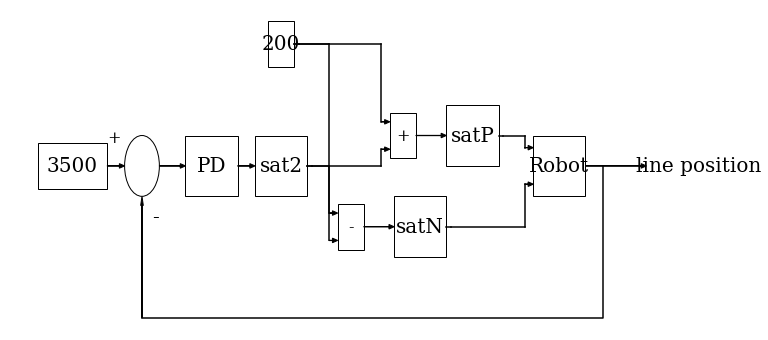

In [64]:
mysys = mydraw(block_list)

In [65]:
mysys.append_menu_param_from_block(D,"Kp")

In [66]:
mysys.append_menu_param_from_block(D,"Kd")

In [67]:
mysys.append_menu_param_from_block(v_nom,"value",1)

In [68]:
mysys.append_menu_param_global_variable("t_stop")

In [69]:
mysys.menu_param_list

[('PD_block.Kp', 0),
 ('PD_block.Kd', 0),
 ('v_nom_block.value', 1),
 ('t_stop', 0)]

## Print Blocks

In [70]:
mysys.print_blocks = [sum1,D,sat,add1,subtract1,satP,satN,G]

## Execution Order

In [71]:
mysys.find_execution_order([U,sum1,D,sat,v_nom,add1,subtract1])

In [72]:
mysys.execution_order

## Codegen Test

In [73]:
msg = "Cart Pendulum Line Follow 1"

In [74]:
mysys.welcome_msg = msg

In [75]:
ls *.ino

cart_pendulum_template1_vib_only.ino  cart_pendulum_template2.ino


In [76]:
template_fn = "cart_pendulum_template2.ino"

In [77]:
mysys.generate_arduino_code("cart_pendulum_autogen_2_line_follow_only", template_fn,\
                           verbosity=1)

block: <py_block_diagram.int_constant_block object at 0x7bb2581f28d0>
block: <py_block_diagram.summing_junction object at 0x7bb258197c88>
block: <py_block_diagram.PD_controller object at 0x7bb2581a6080>
block: <py_block_diagram.sat2_adjustable_block object at 0x7bb2581a6630>
block: <py_block_diagram.int_constant_block object at 0x7bb255ee4518>
block: <py_block_diagram.addition_block object at 0x7bb2560d8fd0>
block: <py_block_diagram.subtraction_block object at 0x7bb255f53f98>
block: <py_block_diagram.sat2_adjustable_block object at 0x7bb256054710>
block: <py_block_diagram.sat2_adjustable_block object at 0x7bb255f97d30>
block: <py_block_diagram.plant_with_double_actuator object at 0x7bb2581a6320>
block: <py_block_diagram.output_block object at 0x7bb255d96b70>


bdsysinitcode
int_constant_block U_cl = int_constant_block(3500);
summing_junction sum1_block = summing_junction();
PD_control_block PD_block = PD_control_block(0.1, 0.01);
sat2_adjustable_block sat2_block = sat2_adjustable_block

In [78]:
add1._get_arduino_param_str()

''